# Gaussian on a sphere

## Setup

In [1]:
%matplotlib inline

import sys
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import corner
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import roc_auc_score


## Load results

In [2]:
setup_filenames = [
    "2_3_0.010",
    "2_3_0.001",
    "2_3_0.100",
]
setup_labels = [
    r"$\epsilon = 0.01$",
    r"$\epsilon = 0.001$",
    r"$\epsilon = 0.1$",
]
n_runs = 3

In [3]:
algo_filenames = []
algo_additionals = []
algo_labels = []
algo_colors = []
algo_markers = []
algo_linestyles = []

def add_algo(filename, add, label, c, m, ls):
    algo_filenames.append(filename)
    algo_additionals.append(add)
    algo_labels.append(label)
    algo_colors.append(c)
    algo_markers.append(m)
    algo_linestyles.append(ls)
    
    
add_algo("flow", "_small_long", "Flow", "C0", "s", "-")
add_algo("mf_specified", "_small_long", "MF", "C2", "o", "-") 
add_algo("gamf_specified", "_small_hugebs", "MF-A", "C2", "o", "--")
add_algo("pie", "_small_long", "PIE", "C4", "s", "-") 
add_algo("mf", "_small_prepie", "MLF", "C3", "s", "-")
add_algo("emf", "_small_long", "MLF-E", "C3", "s", "-.")
add_algo("gamf", "_small_hugebs", "MLF-A", "C3", "s", "--") 


In [4]:
def load(name, shape, numpyfy=True, result_dir="../data/results"):
    all_results = []
    
    for algo_filename, algo_add in zip(algo_filenames, algo_additionals):
        algo_results = []
        
        for setup_filename in setup_filenames:
            run_results = []
            
            for run in range(3):
                run_str = "" if run == 0 else "_run{}".format(run)
                try:
                    run_results.append(np.load(
                        "{}/{}_2_spherical_gaussian_{}{}{}_{}.npy".format(
                            result_dir, algo_filename, setup_filename, algo_add, run_str, name
                        )
                    ))
                except FileNotFoundError as e:
                    print(e)
                    if shape is None:
                        run_results.append(None)
                    else:
                        run_results.append(np.nan*np.ones(shape))
                        
            algo_results.append(run_results)
            
        all_results.append(algo_results)
    
    return np.asarray(all_results) if numpyfy else all_results


model_gen_x = load("samples", None, numpyfy=False)
model_gen_logp = load("samples_likelihood", (10000,))
model_gen_distance = load("samples_manifold_distance", (10000,))
model_test_log_likelihood = load("model_log_likelihood_test", (1000,))
model_test_reco_error = load("model_reco_error_test", (1000,))
model_ood_log_likelihood = load("model_log_likelihood_ood", (1000,))
model_ood_reco_error = load("model_reco_error_ood", (1000,))



[Errno 2] No such file or directory: '../data/results/emf_2_spherical_gaussian_2_3_0.010_small_long_run1_samples.npy'
[Errno 2] No such file or directory: '../data/results/emf_2_spherical_gaussian_2_3_0.010_small_long_run2_samples.npy'
[Errno 2] No such file or directory: '../data/results/emf_2_spherical_gaussian_2_3_0.001_small_long_run1_samples.npy'
[Errno 2] No such file or directory: '../data/results/emf_2_spherical_gaussian_2_3_0.001_small_long_run2_samples.npy'
[Errno 2] No such file or directory: '../data/results/emf_2_spherical_gaussian_2_3_0.100_small_long_run1_samples.npy'
[Errno 2] No such file or directory: '../data/results/emf_2_spherical_gaussian_2_3_0.100_small_long_run2_samples.npy'
[Errno 2] No such file or directory: '../data/results/emf_2_spherical_gaussian_2_3_0.010_small_long_run1_samples_likelihood.npy'
[Errno 2] No such file or directory: '../data/results/emf_2_spherical_gaussian_2_3_0.010_small_long_run2_samples_likelihood.npy'
[Errno 2] No such file or director

In [5]:
model_test_reco_error[0, 0, 0]

array([5.74806393e-07, 3.48827228e-07, 9.03949172e-07, 8.44548879e-07,
       1.60490416e-07, 3.33200099e-08, 9.44315161e-07, 5.31360115e-07,
       2.40274005e-07, 1.22878120e-07, 1.94430172e-07, 4.95113341e-07,
       4.96009477e-07, 3.18288954e-07, 5.96093003e-07, 6.33606078e-07,
       4.71687059e-07, 6.59029013e-07, 4.54912708e-07, 1.13120237e-07,
       6.42750251e-07, 3.59176710e-07, 3.53745691e-07, 2.98023224e-08,
       5.96046448e-08, 4.62716457e-07, 6.01977376e-07, 9.89329351e-07,
       6.02714692e-07, 5.96046448e-08, 1.20137003e-07, 4.95113341e-07,
       4.54912708e-07, 1.84317187e-07, 5.21327706e-07, 3.29514506e-07,
       5.66880999e-07, 7.20205662e-07, 1.36571401e-07, 2.81154541e-07,
       6.93184347e-07, 6.91831644e-07, 4.75963247e-07, 7.38472465e-07,
       5.18123443e-07, 1.01503053e-06, 4.47034836e-08, 8.94069672e-08,
       2.48961186e-07, 8.66320249e-07, 2.81475195e-07, 2.19001450e-07,
       6.66400197e-08, 1.20137003e-07, 7.48366233e-07, 1.00737248e-06,
      

In [6]:
# def load(quantity, shape, numpyfy=True, result_dir="../data/results"):
#     all_results = []
    
#     for algo_filename, algo_add in zip(algo_filenames, algo_additionals):
#         results = []
        
#         for setup_filename in setup_filenames:
#             try:
#                 results.append(np.load(
#                     "{}/{}_2_spherical_gaussian_{}{}_{}.npy".format(
#                         result_dir, algo_filename, setup_filename, algo_add, quantity
#                     )
#                 ))
#             except FileNotFoundError as e:
#                 print(e)
                
#                 if shape is None:
#                     results.append(None)
#                 else:
#                     results.append(np.nan*np.ones(shape))
            
#         all_results.append(results)
        
#     if numpyfy:
#         try:
#             all_results = np.array(all_results, dtype=np.float)
#         except:
#             print(quantity, [[y.shape for y in x] for x in all_results])
    
#     return all_results


# x_gen = load("samples", None, numpyfy=False)
# logp_gen = load("samples_likelihood", (10000,))
# distance_gen = load("samples_manifold_distance", (10000,))

# true_test_log_likelihood = load("true_log_likelihood_test", (1000,))
# model_test_log_likelihood = load("model_log_likelihood_test", (1000,))
# model_test_reco_error = load("model_reco_error_test", (1000,))

# model_ood_log_likelihood = load("model_log_likelihood_ood", (1000,))
# model_ood_reco_error = load("model_reco_error_ood", (1000,))


In [7]:
def load_truth(name, samples=True):
    if samples:
        return np.asarray([
            [
                np.load("../data/samples/spherical_gaussian/spherical_gaussian_{}_{}{}.npy".format(
                    setup_filename, name, run_str
                ))
                for run_str in [""] + ["_run{}".format(i) for i in range(1, n_runs)]
            ]
            for setup_filename in setup_filenames
        ])
    else:
        return np.asarray([
            [
                np.load("../data/results/truth_spherical_gaussian_{}{}_{}.npy".format(
                    setup_filename, run_str, name
                ))
                for run_str in [""] + ["_run{}".format(i) for i in range(1, n_runs)]
            ]
            for setup_filename in setup_filenames
        ])


test_x = load_truth("x_test", True)
test_distance = np.abs(np.sum(test_x**2, axis=-1)**0.5 - 1.)
test_logp = load_truth("true_log_likelihood_test", False)


## Calculate metrics

In [8]:
min_logp = -100.
max_distance = 10.

model_gen_mean_logp = np.mean(np.clip(model_gen_logp, min_logp, None), axis=3)
model_gen_mean_distance = np.mean(np.clip(model_gen_distance, None, max_distance), axis=3)

test_mean_logp = np.mean(np.clip(test_logp, min_logp, None), axis=2)
test_mean_distance = np.mean(np.clip(test_distance, None, max_distance), axis=2)

In [9]:
def calculate_roc_auc(x0, x1):
    assert x0.shape == x1.shape
    old_shape = x0.shape[:-1]
    x0 = x0.reshape(-1, x0.shape[-1])
    x1 = x1.reshape(-1, x0.shape[-1])
    
    aucs = []
    for x0_, x1_ in zip(x0, x1):
        if not np.all(np.isfinite(np.hstack((x0_, x1_)))):
            aucs.append(np.nan)
            continue
            
        auc = roc_auc_score(
            np.hstack((np.zeros(x0_.shape[0], dtype=np.int), np.ones(x1_.shape[0], dtype=np.int))),
            np.hstack((x0_, x1_)),
        )
        auc_flipped = roc_auc_score(
            np.hstack((np.zeros(x0_.shape[0], dtype=np.int), np.ones(x1_.shape[0], dtype=np.int))),
            - np.hstack((x0_, x1_)),
        )
        aucs.append(max(auc, auc_flipped))
        
    aucs = np.asarray(aucs).reshape(old_shape)
    return aucs


model_auc_logp = calculate_roc_auc(model_test_log_likelihood, model_ood_log_likelihood)
model_auc_err = calculate_roc_auc(model_test_reco_error, model_ood_reco_error)
model_auc_use_err = (model_auc_err > model_auc_logp)
model_auc = np.maximum(model_auc_err, model_auc_logp)


/Users/johannbrehmer/anaconda3/envs/ml/lib/python3.6/site-packages/ipykernel_launcher.py:29: RuntimeWarning: invalid value encountered in greater


## Debug plots: Manifold flow failure modes

In [10]:
def plot_gen(algo=2, setup=0, run=0, boundary=1.2, n=2000):
    x = model_gen_x[algo][setup][run][:n]
    r = np.sum(x**2, axis=1)**0.5

    fig = plt.figure(figsize=(6,5))
    ax = fig.add_subplot(1, 1, 1, projection="3d")

    sc = ax.scatter(x[:,0], x[:,1], x[:,2], c=r[:], cmap="RdYlBu", vmin=0.8, vmax=1.2)
    cbar = plt.colorbar(sc)

    ax.set_xlim(-boundary, boundary)
    ax.set_ylim(-boundary, boundary)
    ax.set_zlim(-boundary, boundary)

    plt.tight_layout()
    plt.show()

In [11]:
def plot_test(algo=2, setup=0, run=0, boundary=1.2, n=1000):
    x = test_x[setup, run, :n]
    logp = model_test_log_likelihood[algo,setup,run,:n]

    fig = plt.figure(figsize=(6,5))
    ax = fig.add_subplot(1, 1, 1, projection="3d")

    sc = ax.scatter(x[:,0], x[:,1], x[:,2], c=logp, cmap="viridis", vmin=-10., vmax=7.)
    cbar = plt.colorbar(sc)

    ax.set_xlim(-boundary, boundary)
    ax.set_ylim(-boundary, boundary)
    ax.set_zlim(-boundary, boundary)

    plt.tight_layout()
    plt.show()

### Substantial probability mass outside support of training data (last training phase helps)

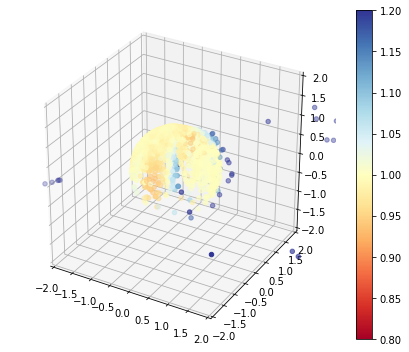

In [12]:
plot_gen(4, 1, 0, 2)

### Adversarial training: Individual outliers far away from manifold

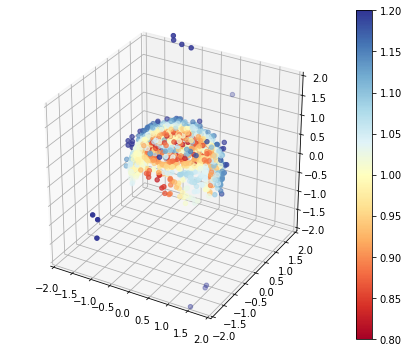

In [13]:
plot_gen(6, 2, 1, 2)

## Plot generated samples

In [14]:
def show_corner(algo=None, show=0, boundary=1.5):
    if algo is None:
        print("Simulator")
        x = np.load("../data/samples/spherical_gaussian/spherical_gaussian_2_3_0.010_x_test.npy")
        _ = corner.corner(x, range=[(-boundary, boundary) for _ in range(3)], bins=10)
        
    else:
        print(algo_labels[algo])
        _ = corner.corner(x_gen[algo][show], range=[(-boundary, boundary) for _ in range(3)], bins=10)
        
        
def show_scatter(algo=None, show=0, boundary=1.5):
    if algo is None:
        print("Simulator")
        x = np.load("../data/samples/spherical_gaussian/spherical_gaussian_2_3_0.010_x_train.npy")[:1000]
    else:
        print(algo_labels[algo])
        x = x_gen[algo][show][:1000]
        
    fig = plt.figure(figsize=(5,5))
    ax = Axes3D(fig)
    ax.scatter(x[:,0], x[:,1], x[:,2])
    
    ax.set_xlim(-boundary, boundary)
    ax.set_ylim(-boundary, boundary)
    ax.set_zlim(-boundary, boundary)
    ax.set_xlabel("$x_0$")
    ax.set_ylabel("$x_1$")
    ax.set_zlabel("$x_2$")
    
    plt.show()    

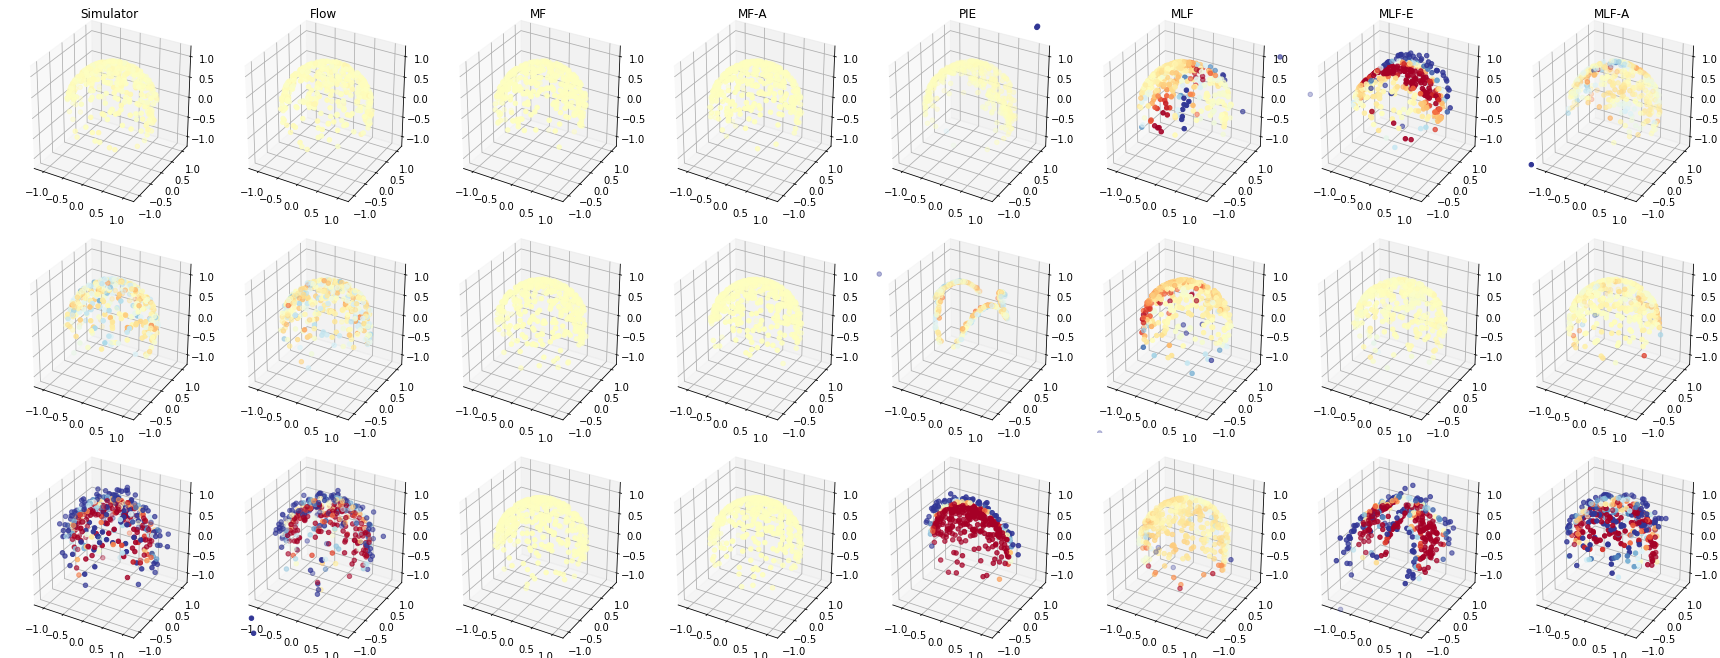

In [15]:
# cmin, cmax = -20., 5.
cmin, cmax = 0.95, 1.05
boundary = 1.2
show = [1,0,2]
run = 0

ncols = len(algo_labels) + 1
nrows = len(show)

fig = plt.figure(figsize=(ncols*3., nrows*3.1))

for col, algo in enumerate(range(-1, len(algo_labels))):
    for row, setup in enumerate(show):
        if algo < 0:
            x = test_x[setup, run, :400]
        else:
            if model_gen_x[algo][setup][run] is None:
                continue
            else:
                x = model_gen_x[algo][setup][run][:400]
                
        logp = np.clip(
            test_logp[setup, run, :400] if algo < 0 else model_gen_logp[algo, setup, run, :400],
            cmin, cmax
        )
        r = np.sum(x**2, axis=1)**0.5
        
        ax = fig.add_subplot(nrows, ncols, row * ncols + col + 1, projection="3d")
        # ax.scatter(x[:,0], x[:,1], x[:,2], c=logp, cmap="viridis", vmin=cmin, vmax=cmax)
        ax.scatter(x[:,0], x[:,1], x[:,2], c=r, cmap="RdYlBu", vmin=cmin, vmax=cmax)

        ax.set_xlim(-boundary, boundary)
        ax.set_ylim(-boundary, boundary)
        ax.set_zlim(-boundary, boundary)
        ax.set_xlabel("")
        ax.set_ylabel("")
        ax.set_zlabel("")
        
#         if col == 0:
#             #ax.set_ylabel(setup_labels[setup], rotation=0, size='large')
#             ax.annotate(setup_labels[setup], xy=(0, 0.5), xytext=(-ax.yaxis.labelpad - 0., 0),
#                         xycoords=ax.yaxis.label, textcoords='offset points',
#                         size='large', ha='right', va='center')
        if row == 0:
            ax.set_title("Simulator" if algo < 0 else algo_labels[algo])

plt.tight_layout()
plt.savefig("../figures/generated_samples_3d_spherical_gaussian.pdf")



## Plot eval likelihood on test samples

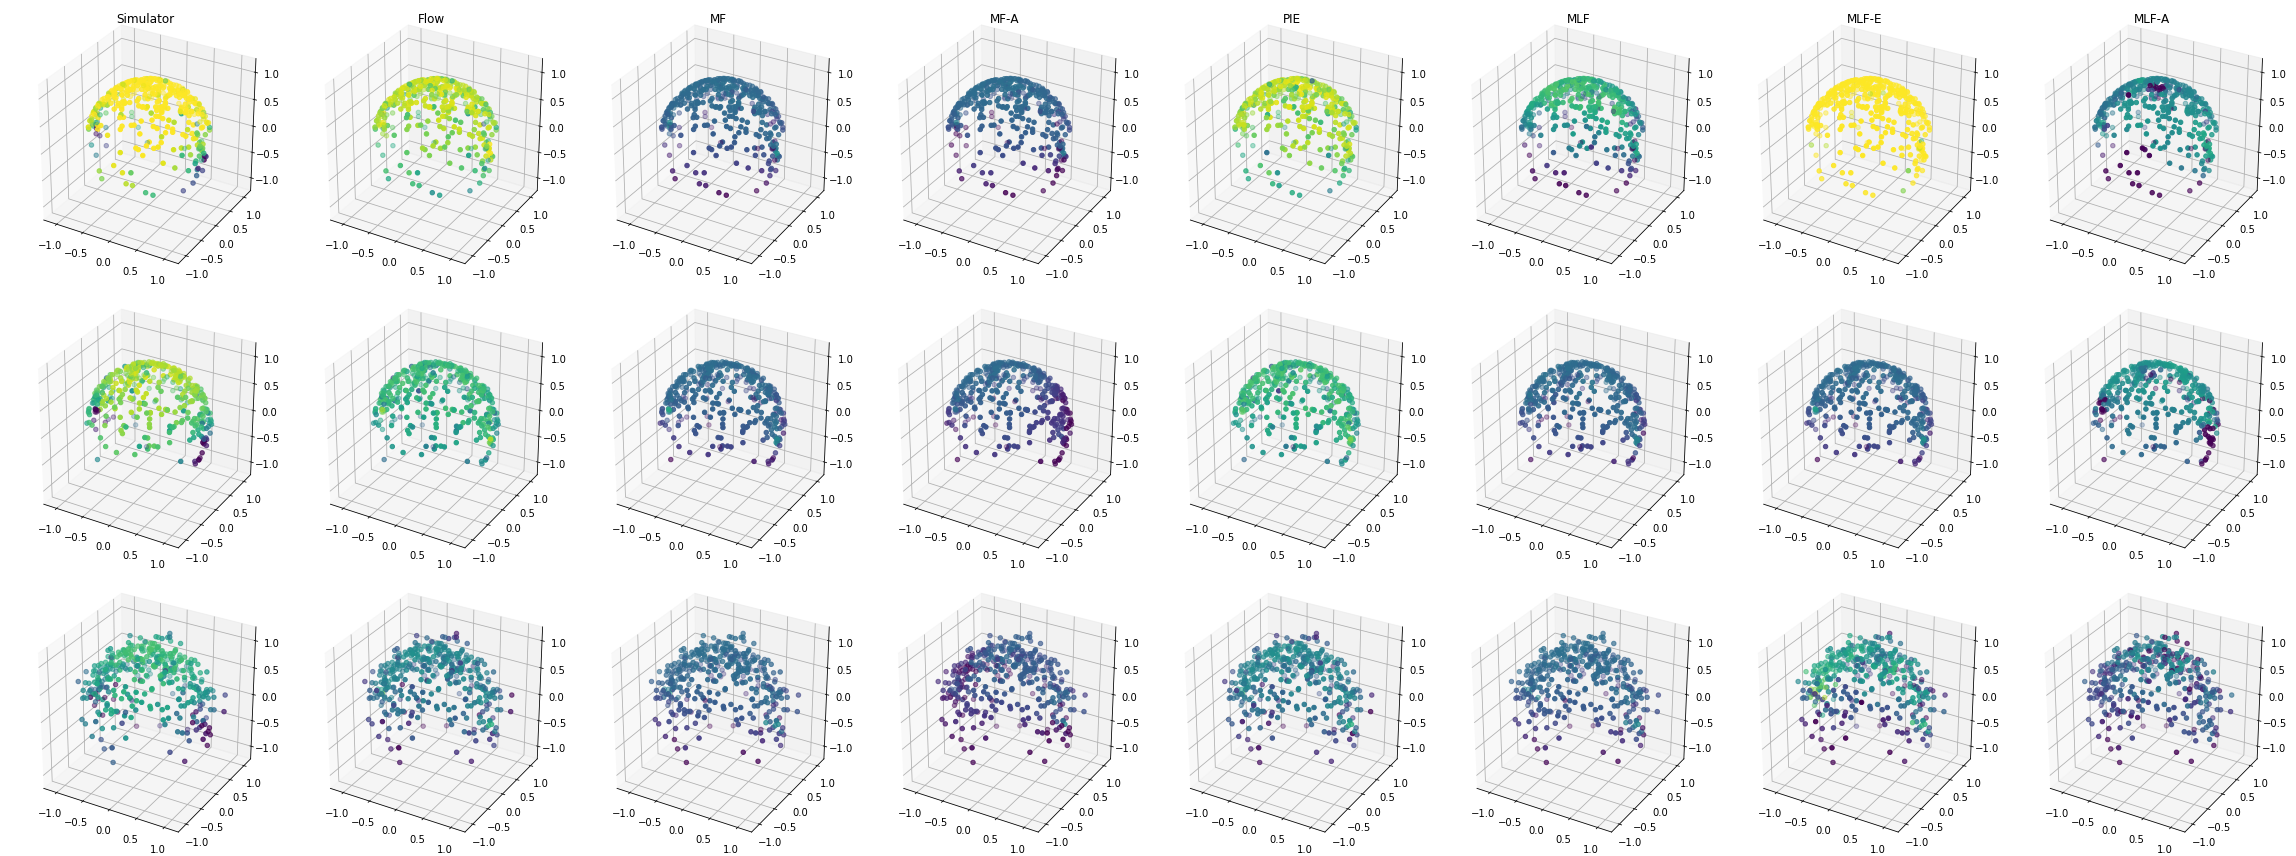

In [16]:
cmin, cmax = -5., 5.
boundary = 1.2
show = [1,0,2]
run = 0

ncols = len(algo_labels) + 1
nrows = len(show)

fig = plt.figure(figsize=(ncols*4, nrows*4))

for col, algo in enumerate(range(-1, len(algo_labels))):
    for row, setup in enumerate(show):
        x = test_x[setup, run, :400]
        if algo > 0 and model_test_log_likelihood[algo, setup, run] is None:
            continue
        else:
            logp = np.clip(
                test_logp[setup, run, :400] if algo < 0 else model_test_log_likelihood[algo, setup, run, :400],
                cmin, cmax
            )
        
        ax = fig.add_subplot(nrows, ncols, row * ncols + col + 1, projection="3d")
        ax.scatter(x[:,0], x[:,1], x[:,2], c=logp, vmin=cmin, vmax=cmax, cmap="viridis")

        ax.set_xlim(-boundary, boundary)
        ax.set_ylim(-boundary, boundary)
        ax.set_zlim(-boundary, boundary)
        ax.set_xlabel("")
        ax.set_ylabel("")
        ax.set_zlabel("")
        
        if row == 0:
            ax.set_title("Simulator" if algo < 0 else algo_labels[algo])

plt.tight_layout()
plt.savefig("../figures/test_likelihood_3d_spherical_gaussian.pdf")


## Evaluation metrics

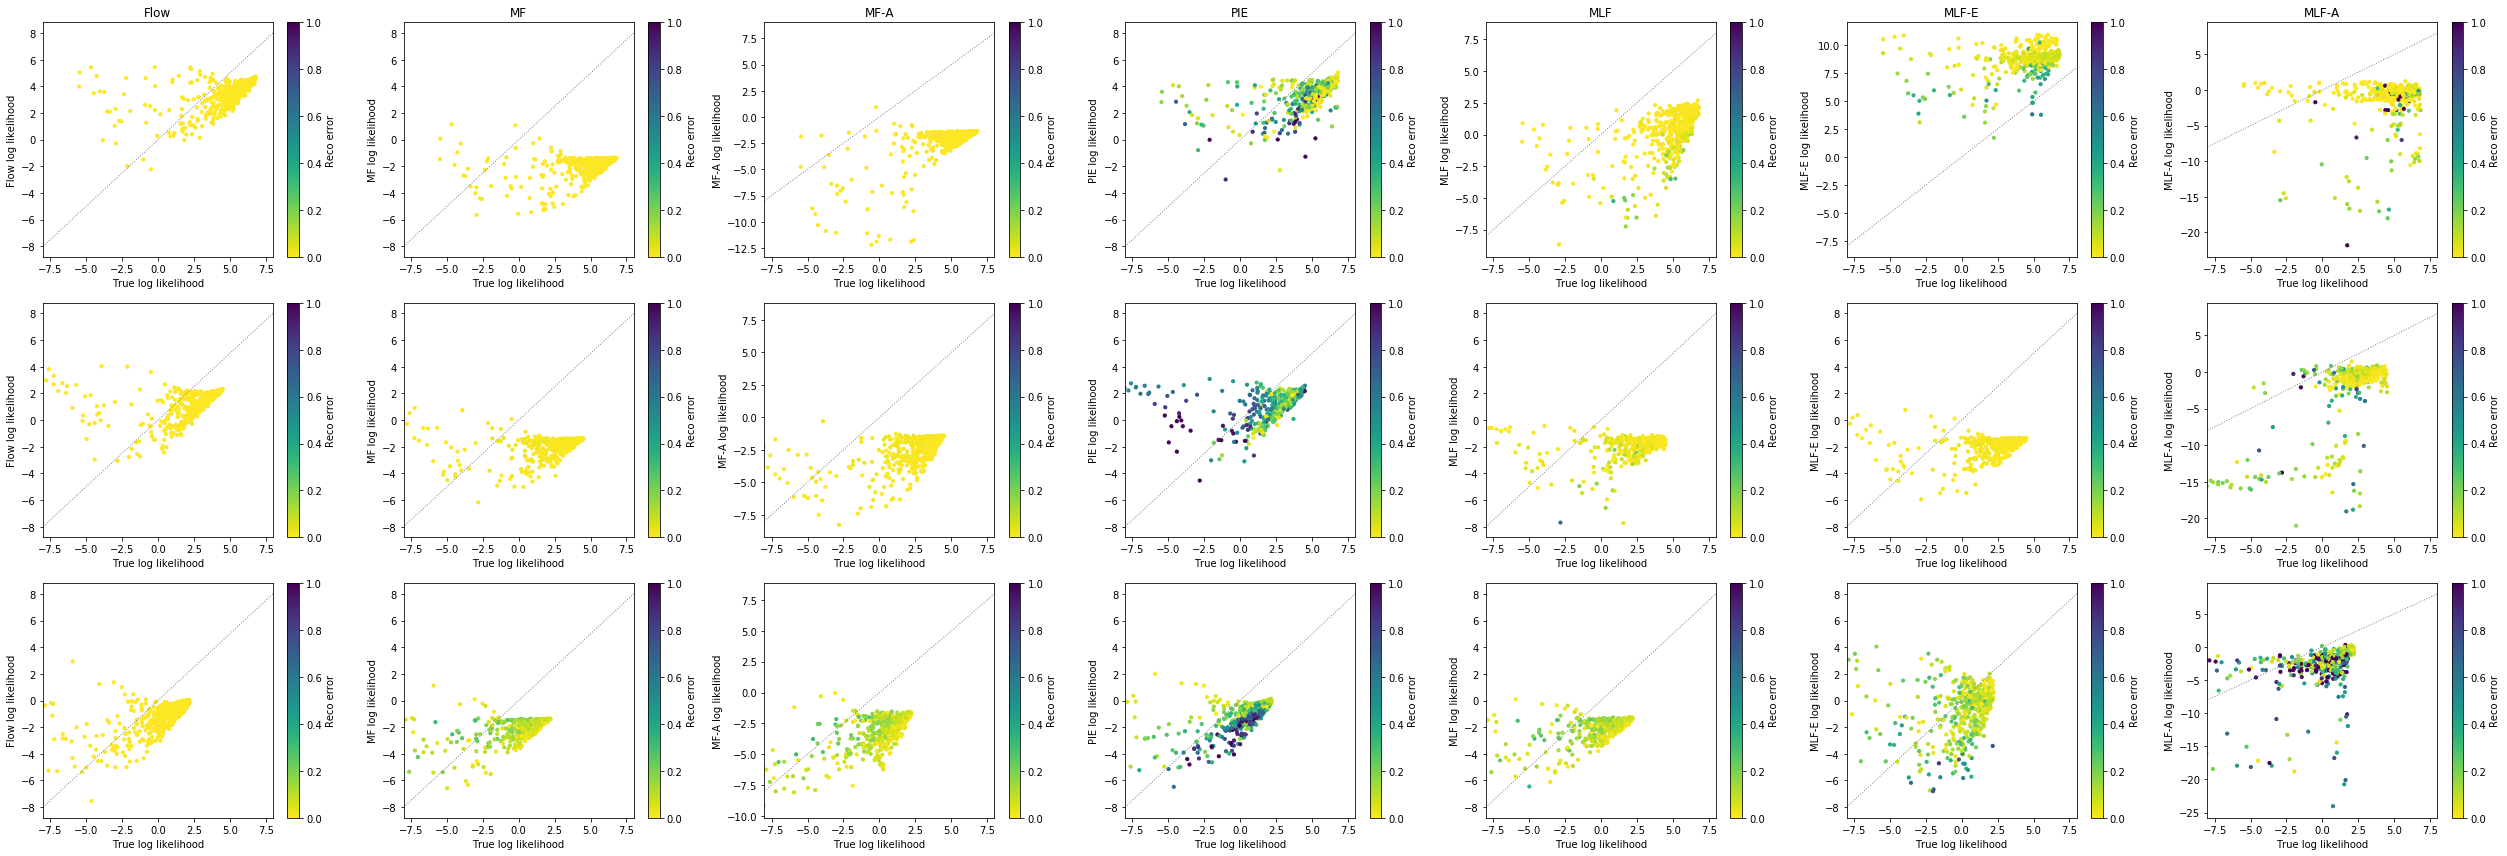

In [17]:
show = [1,0,2]
run = 0

ncols = len(algo_labels)
nrows = len(show)

fig = plt.figure(figsize=(ncols*5, nrows*4))

for row, setting in enumerate(show):
    for col, algo_label in enumerate(algo_labels):
        ax = plt.subplot(nrows, ncols, row*ncols + col + 1)
        
        plt.plot([-8, 8.], [-8.,8.], ls=":", c="0.5", lw=1.)
        sc = plt.scatter(
            test_logp[setting, run, :500],
            model_test_log_likelihood[col, setting, run, :500],
            # c=np.log(np.clip(model_test_reco_error[col, setting,:500], np.exp(-10.), np.exp(10.))),
            c=model_test_reco_error[col, setting, run, :500],
            s=10.,
            label=algo_label,
            cmap="viridis_r",
            vmin=0., vmax=1.
        )
        cbar = plt.colorbar(sc)
        
        plt.xlabel(r"True log likelihood")
        plt.ylabel(r"{} log likelihood".format(algo_label))
        cbar.set_label('Reco error')
        
        if row == 0:
            ax.set_title(algo_label)
        
        plt.xlim(-8.,8.)
        #plt.ylim(-8.,8.)
    
plt.tight_layout()
plt.savefig("../figures/test_likelihood_scatter_spherical_gaussian.pdf")


## OOD detection

ValueError: color kwarg must have one color per data set. 1000 data sets and 1 colors were provided

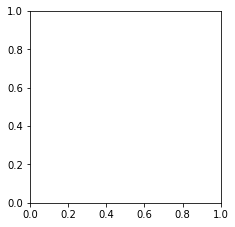

In [18]:
show = [1,0,2]

ncols = len(algo_labels)
nrows = len(show)

fig = plt.figure(figsize=(ncols*4, nrows*4))

for row, setting in enumerate(show):
    for col, algo_label in enumerate(algo_labels):
        ax = plt.subplot(nrows, ncols, row*ncols + col + 1)
        
        logp = model_test_log_likelihood[col, setting]
        if np.any(np.isnan(logp)):
            continue
            
        logp_ood = model_ood_log_likelihood[col, setting]
        err = model_test_reco_error[col, setting]
        err_ood = model_ood_reco_error[col, setting]
        
        use_err = True  # auc_use_err[col, setting]
        x = err if use_err else logp
        x_ood = err_ood if use_err else logp_ood
        xmin, xmax = np.percentile(np.concatenate((x, x_ood)), (2., 98.))
        xmin -= (xmax - xmin)*0.05
        xmax += (xmax - xmin)*0.05
        
        plt.hist(x, color="C0", bins=100, range=(xmin, xmax), histtype="step")
        plt.hist(x_ood, color="C1", bins=100, range=(xmin, xmax), histtype="step")
        
        plt.xlabel(("{} reco error" if use_err else "{} log likelihood").format(algo_label))
        plt.ylabel("Histogram ({})".format(setting))
        
        plt.xlim(xmin, xmax)
        plt.ylim(0., None)
    
plt.tight_layout()
plt.savefig("../figures/ood_separation_recoerror_spherical_gaussian.pdf")



In [ ]:
show = [1,0,2]

ncols = len(algo_labels)
nrows = len(show)

fig = plt.figure(figsize=(ncols*4, nrows*4))

for row, setting in enumerate(show):
    for col, algo_label in enumerate(algo_labels):
        ax = plt.subplot(nrows, ncols, row*ncols + col + 1)
        
        logp = model_test_log_likelihood[col, setting]
        if np.any(np.isnan(logp)):
            continue
            
        logp_ood = model_ood_log_likelihood[col, setting]
        err = model_test_reco_error[col, setting]
        err_ood = model_ood_reco_error[col, setting]
        
        use_err = auc_use_err[col, setting]
        x = err if use_err else logp
        x_ood = err_ood if use_err else logp_ood
        xmin, xmax = np.percentile(np.concatenate((x, x_ood)), (2., 98.))
        xmin -= (xmax - xmin)*0.05
        xmax += (xmax - xmin)*0.05
        
        plt.hist(x, color="C0", bins=100, range=(xmin, xmax), histtype="step")
        plt.hist(x_ood, color="C1", bins=100, range=(xmin, xmax), histtype="step")
        
        plt.xlabel(("{} reco error" if use_err else "{} log likelihood").format(algo_label))
        plt.ylabel("Histogram ({})".format(setting))
        
        plt.xlim(xmin, xmax)
        plt.ylim(0., None)
    
plt.tight_layout()
plt.savefig("../figures/ood_separation_spherical_gaussian.pdf")



## Generative metrics

NameError: name 'true_distances' is not defined

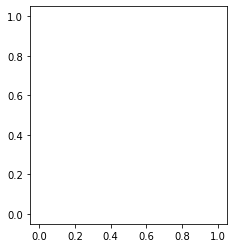

In [19]:
show = [1,0,2]
ncols = 3
nrows = (len(show) - 1) // ncols + 1

xmin, xmax = 0.,0.4

fig = plt.figure(figsize=(ncols*4, nrows*4))

for panel, setting in enumerate(show):
    ax = plt.subplot(nrows, ncols, panel + 1)
    
    plt.plot([], [], lw=0., ls=" ", label=setup_labels[setting])
    
    plt.hist(
        true_distances[setting,:],
        range=(xmin, xmax), bins=50,
        label="Simulator",
        histtype="step",
        lw=1.5,
        color="black",
        density=True
    )
    
    for algo, (algo_label, c, m, ls) in enumerate(zip(algo_labels, algo_colors, algo_markers, algo_linestyles)):
        plt.hist(
            distance_gen[algo, setting,:],
            range=(xmin, xmax), bins=50,
            label=algo_label,
            histtype="step",
            lw=1.5,
            color=c,
            ls=ls,
            density=True
        )
        
    plt.legend()

    plt.xlabel(r"Distance to manifold")
    plt.ylabel(r"Histogram")
    plt.xlim(xmin, xmax)
    plt.ylim(0., 50.)
    #plt.yscale("log")
    
plt.tight_layout()
plt.savefig("../figures/generated_samples_distance_distribution_spherical_gaussian.pdf")


NameError: name 'true_test_log_likelihood' is not defined

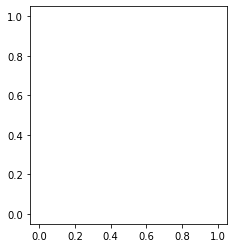

In [20]:
show = [1,0,2]
ncols = 3
nrows = (len(show) - 1) // ncols + 1

xmin, xmax = -12.,8.

fig = plt.figure(figsize=(ncols*4, nrows*4))

for panel, setting in enumerate(show):
    ax = plt.subplot(nrows, ncols, panel + 1)
    
    plt.plot([], [], lw=0., ls=" ", label=setup_labels[setting])
    
    for algo, (algo_label, c, m, ls) in enumerate(zip(algo_labels, algo_colors, algo_markers, algo_linestyles)):
        if algo == 0:
            plt.hist(
                true_test_log_likelihood[algo, setting,:],
                range=(xmin, xmax), bins=50,
                label="Simulator",
                histtype="step",
                lw=1.5,
                color="black",
                density=True,
                ls="-"
            )
        plt.hist(
            logp_gen[algo, setting,:],
            range=(xmin, xmax), bins=50,
            label=algo_label,
            histtype="step",
            lw=1.5,
            color=c,
                density=True,
                ls=ls
        )
        
    plt.legend(loc="upper left")

    plt.xlabel(r"Log likelihood")
    plt.ylabel(r"Histogram")
    plt.xlim(xmin, xmax)
    # plt.ylim(1.e-3, None)
    
plt.tight_layout()
plt.savefig("../figures/generated_samples_likelihood_distribution_spherical_gaussian.pdf")



## Summary plot

In [21]:
def plot(x, yvals, ls="-", m=" ", ms=6., c="black", label=None, alpha=0.1, **kwargs):
    y_mean, y_err = np.nanmean(yvals, axis=1), np.nanstd(yvals, axis=1)
    plt.fill_between(x, y_mean - y_err, y_mean + y_err, color=c, alpha=alpha)
    plt.plot(x, y_mean, label=label, ls=ls, marker=m, ms=ms, c=c, **kwargs)

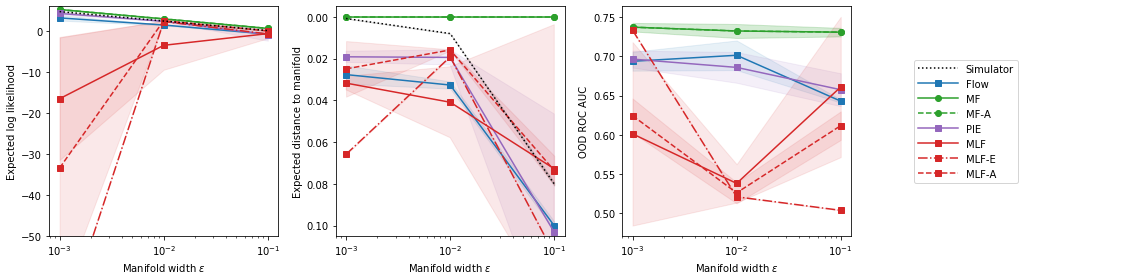

In [23]:
show = [1,0,2]
xs = [0.001, 0.01, 0.1]

fig = plt.figure(figsize=(16,4))

ax = plt.subplot(1,4,1)
plot(xs, test_mean_logp[show], label="Truth", ls=":", m=" ", ms=6., c="black", zorder=5.)
for mean_logp_gen_, algo_label, c, m, ls in zip(model_gen_mean_logp, algo_labels, algo_colors, algo_markers, algo_linestyles):
    plot(xs, mean_logp_gen_[show], label=algo_label, ls=ls, m=m, ms=6., c=c)
plt.xscale("log")
plt.ylim(-50., 6.)
plt.xlabel(r"Manifold width $\varepsilon$")
plt.ylabel("Expected log likelihood")

ax = plt.subplot(1,4,2)
for mean_distance_gen_, algo_label, c, m, ls in zip(model_gen_mean_distance, algo_labels, algo_colors, algo_markers, algo_linestyles):
    plot(xs, mean_distance_gen_[show], label=algo_label, ls=ls, m=m, ms=6, c=c)
plot(xs, test_mean_distance[show], label="Truth", ls=":", m=" ", ms=6., c="black")
plt.xscale("log")
plt.ylim(0.105, -0.005)
plt.xlabel(r"Manifold width $\varepsilon$")
plt.ylabel("Expected distance to manifold")

ax = plt.subplot(1,4,3)
for auc, algo_label, c, m, ls in zip(model_auc, algo_labels, algo_colors, algo_markers, algo_linestyles):
    plot(xs, auc, label=algo_label, ls=ls, m=m, ms=6., c=c)
plt.xscale("log")
# plt.ylim(0.96, 1.002)
plt.xlabel(r"Manifold width $\varepsilon$")
plt.ylabel("OOD ROC AUC")

ax = plt.subplot(1,4,4)
plt.plot([], [], label="Simulator", ls=":", marker=" ", ms=6., c="black",zorder=5.)
for algo_label, c, m, ls in zip(algo_labels, algo_colors, algo_markers, algo_linestyles):
    plt.plot([], [], label=algo_label, ls=ls, marker=m, ms=6., c=c)
plt.legend(handlelength=4.,loc="center left")
plt.axis("off")

plt.tight_layout()
plt.savefig("../figures/metrics_spherical_gaussian.pdf")
